In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import folium

In [ ]:
calendar = pd.read_csv('https://media.githubusercontent.com/media/conguflama/Citadel-Summer-Datathon/main/calendar.csv')
demographics = pd.read_csv('https://media.githubusercontent.com/media/conguflama/Citadel-Summer-Datathon/main/demographics.csv')
econ_state = pd.read_csv('https://media.githubusercontent.com/media/conguflama/Citadel-Summer-Datathon/main/econ_state.csv')
listings = pd.read_csv('https://media.githubusercontent.com/media/conguflama/Citadel-Summer-Datathon/main/listings.csv')
real_estate = pd.read_csv('https://media.githubusercontent.com/media/conguflama/Citadel-Summer-Datathon/main/real_estate.csv')
venues = pd.read_csv('https://media.githubusercontent.com/media/conguflama/Citadel-Summer-Datathon/main/venues.csv')

In [ ]:
len(listings.loc[listings['city'] == 'Asheville'])

763

In [ ]:
econ_state.head

<bound method NDFrame.head of    state  2005Q1_gdp  2005Q2_gdp  ...  2016/10_ur  2016/11_ur  2016/12_ur
0     AL      153332      155940  ...         6.6         6.6         6.6
1     AK       37517       38907  ...         6.1         6.2         6.3
2     AZ      218206      224496  ...         4.0         4.0         3.9
3     AR       88446       89264  ...         5.0         5.0         5.0
4     CA     1722091     1747827  ...         5.3         5.3         5.2
5     CO      216906      218710  ...         3.1         3.0         3.0
6     CT      207262      210134  ...         4.6         4.5         4.4
7     DE       52121       51156  ...         5.8         5.8         5.7
8     DC       82522       83530  ...         4.3         4.3         4.3
9     FL      680384      690146  ...         4.9         4.9         4.9
10    GA      382630      385693  ...         5.4         5.5         5.5
11    HI       57292       57899  ...         2.9         2.9         2.9
12    ID

In [ ]:
listings['city'].unique()

array(['Asheville', 'Woodfin', 'Weaverville', 'Candler', 'Arden',
       'Fletcher', 'Mills River', 'austin', 'dripping springs', 'lakeway',
       'bee cave', 'the hills', 'lockhart', 'del valle', 'sunset valley',
       'manchaca', 'san antonio', 'west lake hills', 'portland',
       'rollingwood', 'pflugerville', 'point venture', 'nashville',
       'ashland city', 'antioch', 'madison', 'cane ridge', 'brentwood',
       'pegram', 'archwood acres rio', 'whites creek', 'goodlettsville',
       'berry hill', 'hermitage', 'mount juliet', 'old hickory',
       'New Orleans', 'Arabi', 'ByWater-Marigny, New Orleans',
       'ByWater-Marigny, New Orleans ', 'Slidell', 'New Orleans ',
       'New Orleans, Louisiana, US', '紐奧良', 'Gretna', 'Metairie', 'acton',
       'palmdale', 'los angeles', 'private room near usc', 'agoura hills',
       'monterey park', 'thousand oaks', 'westlake village',
       'santa clarita', 'agua dulce', 'alhambra', 'south pasadena',
       'gardena', 'artesia', 'cas

In [ ]:
listings['state'].unique()

array(['NC', 'TX', 'OR', 'TN', 'LA', 'CA', 'DC'], dtype=object)

In [ ]:
venues['city'].unique()

array(['asheville', 'austin', 'nashville', 'new orleans', 'los angeles'],
      dtype=object)

In [ ]:
listings['metropolitan'].unique()

array(['asheville', 'austin', 'nashville', 'new_orleans', 'LA'],
      dtype=object)

## 1.1 Exploring Listing Data

In [ ]:
listings.head()

,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,has_availability,host_id,id,instant_bookable,latitude,longitude,metropolitan,name,price,property_type,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,state,weekly_price,zipcode
0,2.0,"{""Wireless Internet"",""Air Conditioning"",Kitche...",0,1.0,Real Bed,1.0,1.0,moderate,Asheville,NaN,2600734,665257,f,35.590784,-82.591466,asheville,"Lovely cabin, great Asheville spot",$105.00,House,10.0,9.0,10.0,9.0,96.0,10.0,Entire home/apt,NC,$650.00,28806.0
1,4.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",17,1.0,Real Bed,1.0,2.0,strict,Asheville,NaN,4295819,2746729,f,35.584968,-82.632199,asheville,Glamping w HOT TUB + AC!,$125.00,Tent,10.0,10.0,10.0,9.0,96.0,9.0,Entire home/apt,NC,NaN,28806.0
2,1.0,"{TV,""Wireless Internet"",""Air Conditioning"",Kit...",29,1.0,Real Bed,1.0,1.0,flexible,Asheville,NaN,36223353,6919450,f,35.626600,-82.637618,asheville,"Good size bedroom, private",$45.00,House,NaN,NaN,NaN,NaN,NaN,NaN,Private room,NC,NaN,28806.0
3,6.0,"{Internet,""Wireless Internet"",""Air Conditionin...",28,2.5,Real Bed,1.0,6.0,moderate,Asheville,NaN,746673,12286328,f,35.579159,-82.596392,asheville,Mixed Dorm,$24.00,Dorm,NaN,NaN,NaN,NaN,NaN,NaN,Shared room,NC,NaN,28806.0
4,6.0,"{Internet,""Wireless Internet"",""Free Parking on...",25,2.5,Real Bed,1.0,6.0,moderate,Asheville,NaN,746673,156926,f,35.577755,-82.594996,asheville,Mixed Dorm Bunk at BPS Hostel,$24.00,House,10.0,9.0,9.0,9.0,93.0,10.0,Shared room,NC,NaN,28806.0


In [ ]:
# Summary of listings data.
print(listings.head())
print("\n-------------------------------------------------------------------------------------\n")
print(listings.info())
listings.describe(include='all').transpose()

   accommodates  ...  zipcode
0           2.0  ...  28806.0
1           4.0  ...  28806.0
2           1.0  ...  28806.0
3           6.0  ...  28806.0
4           6.0  ...  28806.0

[5 rows x 29 columns]

-------------------------------------------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50321 entries, 0 to 50320
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   accommodates                 50321 non-null  float64
 1   amenities                    50321 non-null  object 
 2   availability_30              50321 non-null  int64  
 3   bathrooms                    50174 non-null  float64
 4   bed_type                     50321 non-null  object 
 5   bedrooms                     50277 non-null  float64
 6   beds                         50229 non-null  float64
 7   cancellation_policy          50321 non-null  object 
 8   city           

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
accommodates,50321,NaN,NaN,NaN,3.84509,2.67786,1,2,3,5,16
amenities,50321,44220,{},592,NaN,NaN,NaN,NaN,NaN,NaN,NaN
availability_30,50321,NaN,NaN,NaN,13.9039,11.3316,0,1,13,25,30
bathrooms,50174,NaN,NaN,NaN,1.41894,0.818857,0,1,1,2,8
bed_type,50321,5,Real Bed,49062,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bedrooms,50277,NaN,NaN,NaN,1.49713,1.06618,0,1,1,2,10
beds,50229,NaN,NaN,NaN,2.05857,1.63397,0,1,1,3,16
cancellation_policy,50321,6,strict,22277,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,50321,195,los angeles,19515,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_availability,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Check duplicates.
listings.duplicated().sum()

0

In [ ]:
# Check null values.
listings.isnull().sum()

accommodates                       0
amenities                          0
availability_30                    0
bathrooms                        147
bed_type                           0
bedrooms                          44
beds                              92
cancellation_policy                0
city                               0
has_availability               50321
host_id                            0
id                                 0
instant_bookable                   0
latitude                           0
longitude                          0
metropolitan                       0
name                               8
price                              0
property_type                      0
review_scores_checkin          12781
review_scores_cleanliness      12731
review_scores_communication    12732
review_scores_location         12784
review_scores_rating           12675
review_scores_value            12799
room_type                          0
state                              0
w

Description:


In [ ]:
# Pre-clean the dataset and convert datatypes into usable formats.
price_str = listings['price'].str[1:-3]
listings['price'] = price_str.str.extract('(\d+)').astype(int)
listings['price']

0        105
1        125
2         45
3         24
4         24
        ... 
50316     75
50317    205
50318    500
50319     65
50320    500
Name: price, Length: 50321, dtype: int64

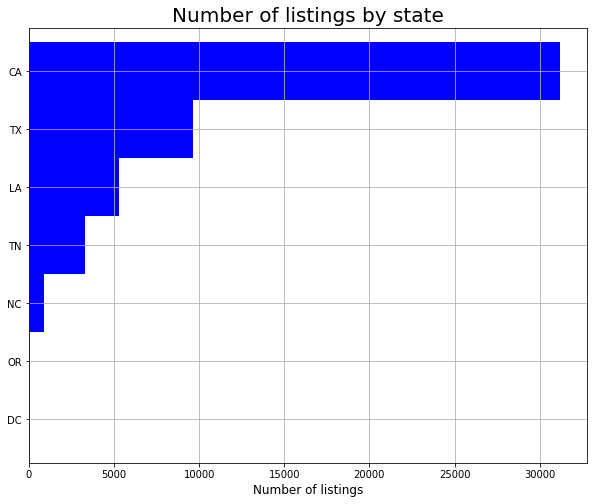

In [ ]:
# Distribution of regions.
freq=listings['state'].value_counts().sort_values(ascending=True)
freq.plot.barh(figsize=(10, 8), color='blue', grid=True, width=1)
plt.title("Number of listings by state", fontsize=20)
plt.xlabel('Number of listings', fontsize=12)
plt.show()

We can observe from the plot above that among all these southern states, CA has the greatest number of listings. This might have something to do with the extent of economic development compared to other states in South.

In [ ]:
# Only one listing in DC and one listing in OR.
OR=listings[listings['state']=='OR']
OR

,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,has_availability,host_id,id,instant_bookable,latitude,longitude,metropolitan,name,price,property_type,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,state,weekly_price,zipcode
8990,2.0,"{Internet,""Wireless Internet"",""Air conditionin...",30,1.0,Pull-out Sofa,1.0,1.0,flexible,portland,NaN,44224198,11712830,f,30.259786,-97.788944,austin,Cozy space minutes from DT,50,House,NaN,NaN,NaN,NaN,NaN,NaN,Shared room,OR,NaN,97202.0


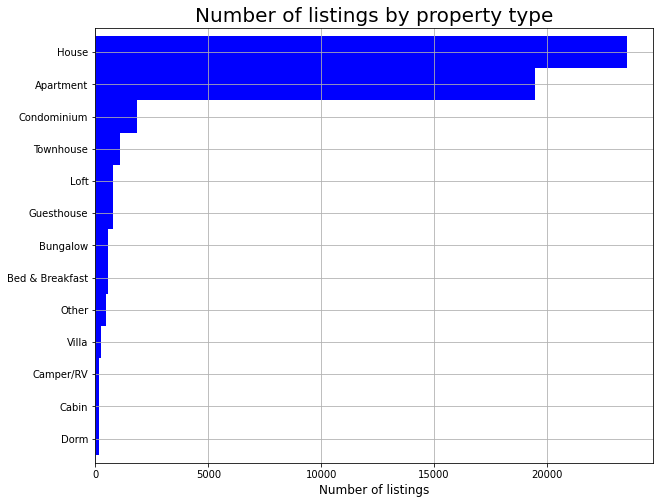

In [ ]:
# Visualize distribution of property types.
freq2=listings['property_type'].value_counts().sort_values(ascending=True)
freq2.drop(freq2[freq2 < 100].index, inplace=True)
freq2.plot.barh(figsize=(10, 8), color='blue', grid=True, width=1)
plt.title("Number of listings by property type", fontsize=20)
plt.xlabel('Number of listings', fontsize=12)
plt.show()

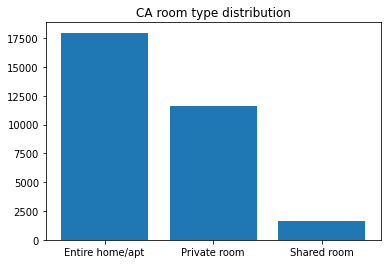

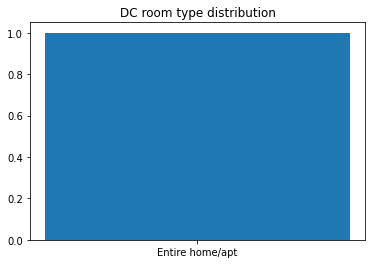

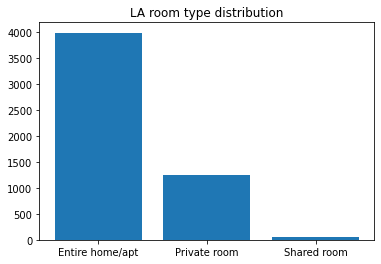

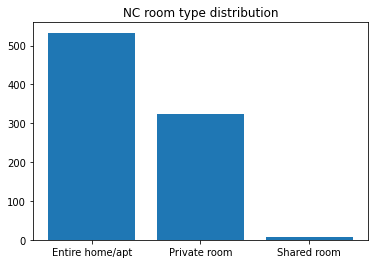

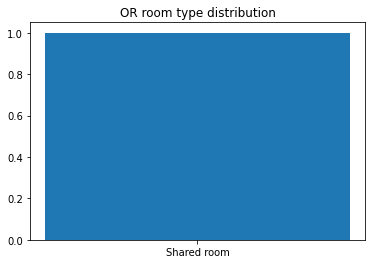

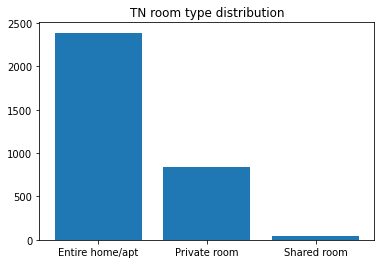

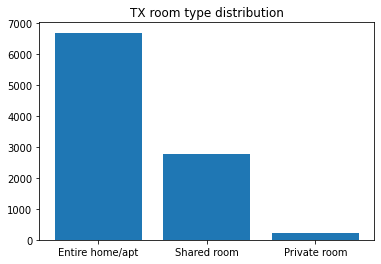

In [ ]:
# Distribution of room type by states.
for key, value in listings.groupby('state'):
  plt.figure()
  room_type = value.room_type.unique()
  room_type_count = value.room_type.value_counts()
  plt.bar(room_type,room_type_count)
  plt.title('{} room type distribution'.format(key))
  plt.show()

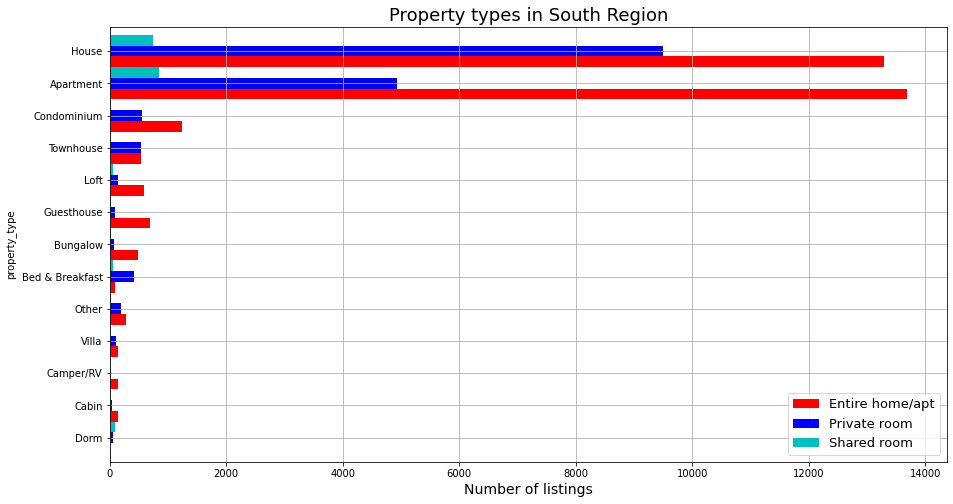

In [ ]:
# Visualize distribution of property types by room types.
group1 = listings.groupby(['property_type','room_type']).room_type.count()
group1 = group1.unstack()
group1['total'] = group1.iloc[:,0:3].sum(axis = 1)
group1 = group1.sort_values(by=['total'])
group1 = group1[group1['total']>=100]
group1 = group1.drop(columns=['total'])

group1.plot(kind='barh', color = ["r","b","c"],
              linewidth = 1, grid=True, figsize=(15,8), width=1)
plt.title('Property types in South Region', fontsize=18)
plt.xlabel('Number of listings', fontsize=14)
plt.legend(loc = 4,prop = {"size" : 13})
plt.rc('ytick', labelsize=13)
plt.show()

By distribution, we can see three general patterns regarding property types and room types:

1)For all the south states in the dataset, the most common room type for rentals is entire home/apt, and shared room is the least common room type.

2)The most common property types across these southern states are house and apartment, followed by condominium and townhouses.

3)For private room rentals, the most common property type is house, while for entire home/apt rentals, the proportion of house and apartment is almost equally big.

## 1.2 Correlations

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


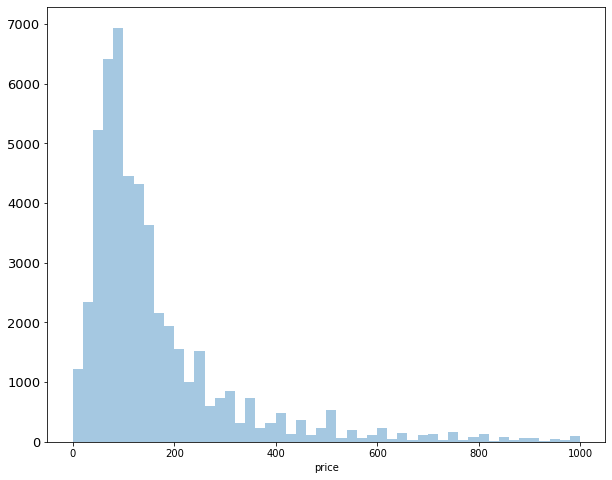

In [ ]:
# Visualize the price distribution.
plt.figure(figsize=(10,8))
sns.distplot(listings['price'],kde = False)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


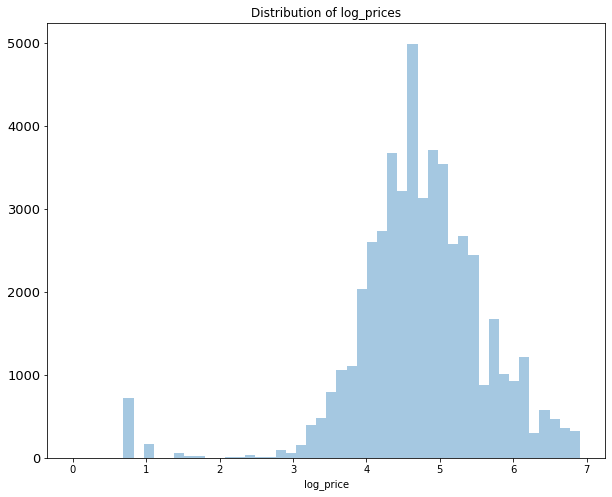

In [ ]:
# Normalize the price since it's highly right-skewed.
listings['log_price'] = np.log(listings['price']+1)

plt.figure(figsize=(10,8))
sns.distplot(listings['log_price'],kde = False)
plt.title('Distribution of log_prices')
plt.show()

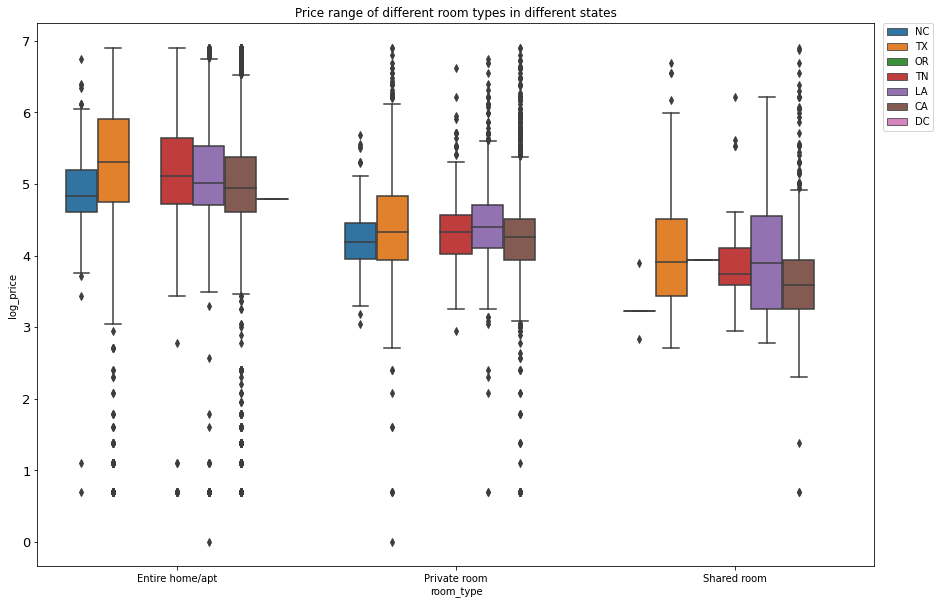

In [ ]:
plt.figure(figsize=(15,10))

#Categorizing log_price into states for differnt room types
#Looks like entire home/apt are more likely to have a higher price.
sns.boxplot(x="room_type", y="log_price",hue="state",data=listings)
plt.title('Price range of different room types in different states')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)

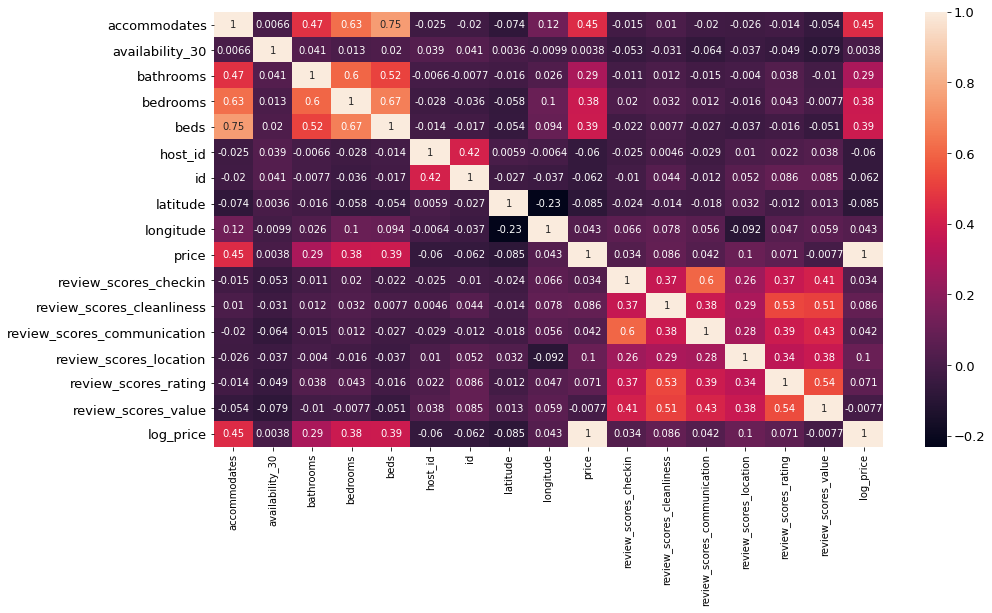

In [ ]:
# Find correlation among the variables. We use kendall correlation here because the assumption is non-parametric.
listings = listings.drop(['has_availability'], axis=1)
corr = listings.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

Text(0.5, 1.0, 'NC')

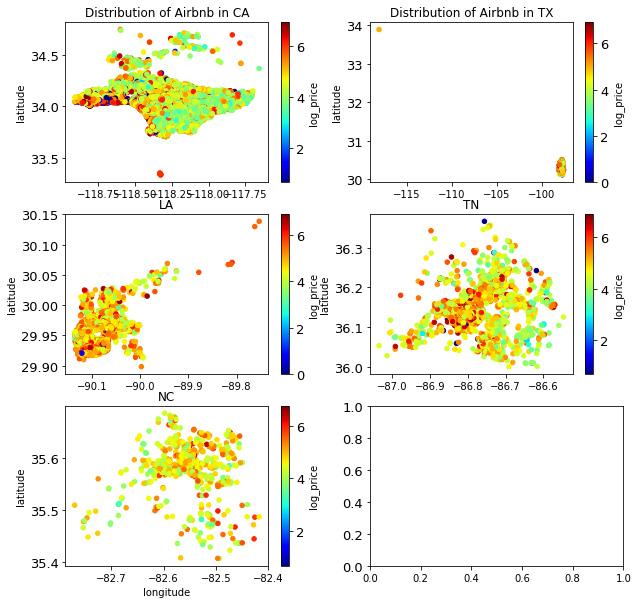

In [ ]:
# Visualization of locations
listings_TX = listings[listings['state'] == 'TX']
listings_LA = listings[listings['state'] == 'LA']
listings_TN = listings[listings['state'] == 'TN']
listings_NC = listings[listings['state'] == 'NC']
listings_CA = listings[listings['state'] == 'CA']

fig, ax = plt.subplots(3,2,figsize=(10,10))
listings_CA.plot(x='longitude',y='latitude', c='log_price',kind='scatter',cmap='jet',ax=ax[0][0])
ax[0][0].set_xlabel('', fontsize=12)
ax[0][0].set_title('Distribution of Airbnb in CA', fontsize=12)
listings_TX.plot(x='longitude',y='latitude', c='log_price',kind='scatter',cmap='jet',ax=ax[0][1])
ax[0][1].set_xlabel('', fontsize=12)
ax[0][1].set_title('Distribution of Airbnb in TX', fontsize=12)
listings_LA.plot(x='longitude',y='latitude', c='log_price',kind='scatter',cmap='jet',ax=ax[1][0])
ax[1][0].set_xlabel('', fontsize=12)
ax[1][0].set_title('LA', fontsize=12)
listings_TN.plot(x='longitude',y='latitude', c='log_price',kind='scatter',cmap='jet',ax=ax[1][1])
ax[1][1].set_xlabel('', fontsize=12)
ax[1][1].set_title('TN', fontsize=12)
listings_NC.plot(x='longitude',y='latitude', c='log_price',kind='scatter',cmap='jet',ax=ax[2][0])
ax[2][0].set_title('NC', fontsize=12)

### 2.1 Calendar Data

In [ ]:
calendar[calendar['available'] == 't'].head(20)

,listing_id,date,available,price,metro_area
39,665257,2016-05-31,t,$105.00,asheville
40,665257,2016-06-01,t,$105.00,asheville
41,665257,2016-06-02,t,$105.00,asheville
42,665257,2016-06-03,t,$105.00,asheville
43,665257,2016-06-04,t,$105.00,asheville
44,665257,2016-06-05,t,$105.00,asheville
45,665257,2016-06-06,t,$105.00,asheville
46,665257,2016-06-07,t,$105.00,asheville
47,665257,2016-06-08,t,$105.00,asheville
48,665257,2016-06-09,t,$105.00,asheville


In [ ]:
# Transform price and data columns into usable formats.
price_str2 = calendar['price'].str[1:-3]
calendar['price'] = price_str2.str.extract('(\d+)').astype(float).round(0)
calendar['date'] = pd.to_datetime(calendar['date'])
print(calendar.head())
print("\n-------------------------------------------------------------------------------------\n")
print(calendar.info())
calendar.describe(include='all').transpose()

   listing_id       date available  price metro_area
0      665257 2016-04-22         f    NaN  asheville
1      665257 2016-04-23         f    NaN  asheville
2      665257 2016-04-24         f    NaN  asheville
3      665257 2016-04-25         f    NaN  asheville
4      665257 2016-04-26         f    NaN  asheville

-------------------------------------------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18383955 entries, 0 to 18383954
Data columns (total 5 columns):
 #   Column      Dtype         
---  ------      -----         
 0   listing_id  int64         
 1   date        datetime64[ns]
 2   available   object        
 3   price       float64       
 4   metro_area  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 701.3+ MB
None


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
listing_id,1.8384e+07,NaN,NaN,NaN,NaT,NaT,1.04615e+07,5.53141e+06,109,5.66104e+06,1.13782e+07,1.53928e+07,1.90386e+07
date,18383955,773,2017-07-24 00:00:00,49503,2016-04-20,2018-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
available,18383955,2,t,9821959,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,9.82196e+06,NaN,NaN,NaN,NaT,NaT,172.097,162.302,1,75,120,200,999
metro_area,18383955,5,LA,11408440,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


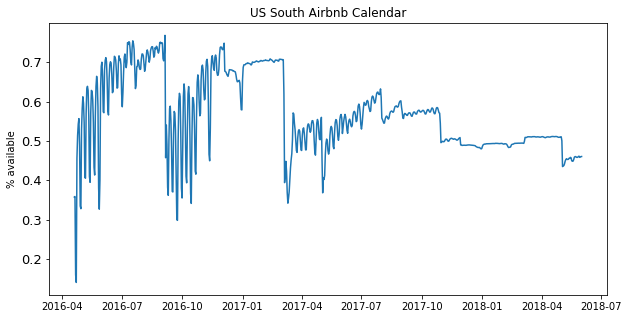

In [ ]:
# Now we want to check for seasonality in the supply.
calendar_avl = calendar[['date', 'available']]
calendar_avl['available'] = calendar_avl.available.map( lambda x: 0 if x == 'f' else 1)
calendar_avl = calendar_avl.groupby('date')['available'].mean().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(calendar_avl['date'], calendar_avl['available'])
plt.title('US South Airbnb Calendar')
plt.ylabel('% available')
plt.show()

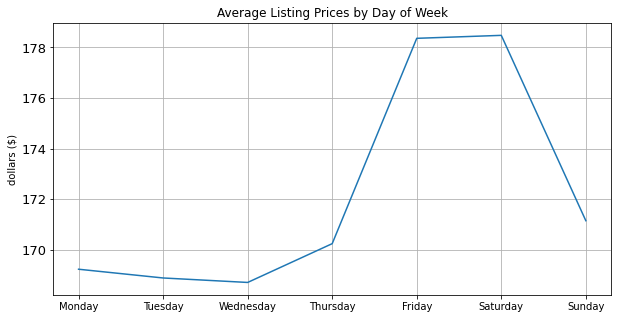

In [ ]:
# We also want to see if there are day of week effects in the calendar data.
calendar['dayofweek'] = calendar['date'].dt.day_name()
days = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
price_week=calendar[calendar.price.notnull()][['dayofweek','price']]
price_week = calendar.groupby(['dayofweek']).mean().reindex(days)
price_week.drop('listing_id', axis=1, inplace=True)

plt.figure(figsize=(10, 5))
plt.plot(price_week)
plt.title('Average Listing Prices by Day of Week')
plt.ylabel('dollars ($)')
plt.grid()
plt.show()

In [ ]:
# Plot Airbnb Listings near Austin

# There is only 1 data point in houston. For display purpose, we take it out.
texas_listings = listings.loc[(listings['state'] == 'TX') & \
                              (listings['city'] != 'houston')]

texas_listings = texas_listings.sample(frac = 0.1)

map = folium.Map(location = [texas_listings['latitude'].mean(),
                 texas_listings['longitude'].mean()],
                 zoom_start = 13, control_scale = True)
for index, location_info in texas_listings.iterrows():
    folium.Marker([location_info["latitude"], location_info["longitude"]]).add_to(map)

map

In [ ]:
venues['city'].unique()

array(['asheville', 'austin', 'nashville', 'new orleans', 'los angeles'],
      dtype=object)

In [ ]:
listings

,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,host_id,id,instant_bookable,latitude,longitude,metropolitan,name,price,property_type,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,state,weekly_price,zipcode,log_price
0,2.0,"{""Wireless Internet"",""Air Conditioning"",Kitche...",0,1.0,Real Bed,1.0,1.0,moderate,Asheville,2600734,665257,f,35.590784,-82.591466,asheville,"Lovely cabin, great Asheville spot",105,House,10.0,9.0,10.0,9.0,96.0,10.0,Entire home/apt,NC,$650.00,28806.0,4.663439
1,4.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",17,1.0,Real Bed,1.0,2.0,strict,Asheville,4295819,2746729,f,35.584968,-82.632199,asheville,Glamping w HOT TUB + AC!,125,Tent,10.0,10.0,10.0,9.0,96.0,9.0,Entire home/apt,NC,NaN,28806.0,4.836282
2,1.0,"{TV,""Wireless Internet"",""Air Conditioning"",Kit...",29,1.0,Real Bed,1.0,1.0,flexible,Asheville,36223353,6919450,f,35.626600,-82.637618,asheville,"Good size bedroom, private",45,House,NaN,NaN,NaN,NaN,NaN,NaN,Private room,NC,NaN,28806.0,3.828641
3,6.0,"{Internet,""Wireless Internet"",""Air Conditionin...",28,2.5,Real Bed,1.0,6.0,moderate,Asheville,746673,12286328,f,35.579159,-82.596392,asheville,Mixed Dorm,24,Dorm,NaN,NaN,NaN,NaN,NaN,NaN,Shared room,NC,NaN,28806.0,3.218876
4,6.0,"{Internet,""Wireless Internet"",""Free Parking on...",25,2.5,Real Bed,1.0,6.0,moderate,Asheville,746673,156926,f,35.577755,-82.594996,asheville,Mixed Dorm Bunk at BPS Hostel,24,House,10.0,9.0,9.0,9.0,93.0,10.0,Shared room,NC,NaN,28806.0,3.218876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50316,2.0,"{TV,""Cable TV"",""Wireless Internet"",""Pets live ...",29,1.0,Real Bed,1.0,1.0,flexible,la habra,107958524,18445825,t,33.930022,-117.974940,LA,"Gorgeous Huge bedroom with Extra,s",75,House,NaN,NaN,NaN,NaN,NaN,NaN,Private room,CA,NaN,90631,4.330733
50317,2.0,"{""Wireless Internet"",Kitchen,""Free parking on ...",29,1.0,Real Bed,1.0,1.0,strict,malibu,850039,18192212,f,34.037906,-118.654012,LA,Ocean View Malibu Dream - April Deal $205/night,205,Apartment,NaN,NaN,NaN,NaN,NaN,NaN,Private room,CA,NaN,90265,5.327876
50318,10.0,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",29,5.0,Real Bed,5.0,5.0,flexible,malibu,117101757,17339165,f,34.036676,-118.650505,LA,"Beautifull Villa to Pacific Coastin, Malibu.",500,Villa,NaN,NaN,NaN,NaN,NaN,NaN,Entire home/apt,CA,NaN,90265,6.216606
50319,4.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",28,1.0,Real Bed,2.0,2.0,moderate,la habra,121899402,17827299,t,33.944261,-117.927134,LA,Entire Lower Level Portion of home,65,House,NaN,NaN,NaN,NaN,NaN,NaN,Private room,CA,NaN,90631,4.189655


In [ ]:
!pip install geopandas
import geopandas as gpd

     |████████████████████████████████| 1.0MB 7.7MB/s 
     |████████████████████████████████| 6.6MB 26.0MB/s 
     |████████████████████████████████| 15.4MB 192kB/s 


In [ ]:
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

In [ ]:
pd.set_option('display.max_rows', 50)

In [ ]:
cities[cities['name'] == 'New York']

,name,geometry
